In [1]:
# plotting imports and setup
%matplotlib inline

import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist


C:\Users\Eugene\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


In [7]:
# classes are already shuffled
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [21]:
labels=['T-shirt/top','Trouser','Pullover','Dress', 'Coat','Sandal','Shirt','Sneaker','Bag', 'Ankle boot']

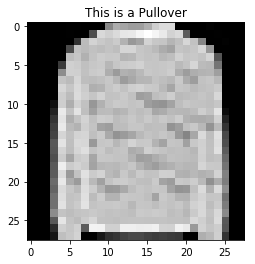

In [26]:
plt.imshow(X_train[234], cmap='gray')
plt.title("This is a %s" % labels[y_train[234]]);

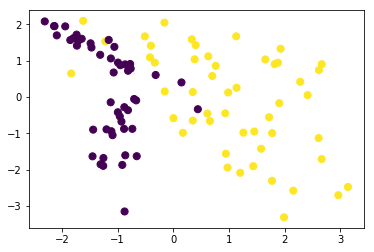

In [45]:
from sklearn.datasets import make_classification


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=15)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=50)

In [46]:
import numpy as np

def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

Y_ = one_hot(2, y)

In [47]:
Y_[1]

array([0., 1.])

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def plot_surface(clf, X, y, n_steps=250, subplot=None, show=True,
                 ylim=None, xlim=None):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if show:
        plt.show()

In [49]:
from keras.layers import Input, Dense, Activation
from keras.models import Model

np.random.seed(123+3)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(2)(inputs)
# to find out more about activations check the keras documentation
predictions = Activation('softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
# to fit the model uncomment this line, experiment with the various settings
model.fit(X, Y_, epochs=100, verbose=False)

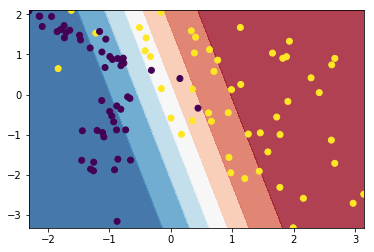

In [50]:
plot_surface(model, X, y)

In [175]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X, y = make_circles(n_samples=400, factor=.3, noise=.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

C:\Users\Eugene\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [176]:
import numpy as np

def one_hot(n_classes, y_train):
    return np.eye(n_classes)[y_train]

Y_ = one_hot(2, y_train)

In [177]:
X_train[:3]

array([[ 0.22137623, -0.124107  ],
       [ 0.1896498 ,  0.12848355],
       [ 0.31537829,  0.26723903]])

In [180]:
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras import optimizers

# All parameter gradients will be clipped to
# a maximum norm of 1.
sgd = optimizers.SGD(lr=0.5, clipnorm=1.)

np.random.seed(35)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x1 = Dense(4)(inputs)
x2 = Dense(4)(x1)
x3 = Dense(2,activation='tanh')(x2)
# to find out more about activations check the keras documentation
#predictions = Activation('sigmoid')(x3)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=x3)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
# to fit the model uncomment this line, experiment with the various settings
model.fit(X_train, Y_, epochs=20, verbose=False,validation_split=0.8)

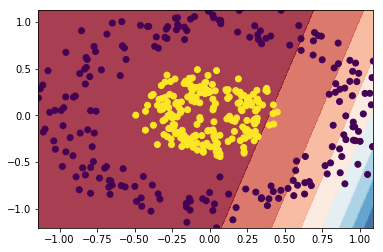

In [181]:
plot_surface(model, X, y)

In [84]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)




In [85]:
from keras import utils


num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [12]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [128]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten





# we define the input shape (i.e., how many input features) **without** the batch size
inp = Input(shape=(28, 28, ))

# turn a 28x28 matrix into a 784-d vector, this removes all information
# about the spatial relation between pixels. Using convolutions will
# allow us to take advantage of that information (see later)
x1 = Flatten()(inp)
x2 = Dense(10)(x1)
x3 = Dense(10)(x2)
x4 = Dense(10)(x3)
x5 = Dense(10)(x4)
x6 = Activation('softmax')(x5)

#
# your network architecture here
#

# we want to predict one of ten classes
#h = Dense(10)(h)
#y = Activation('softmax')(h)

# Package it all up in a Model
net = Model(inputs=inp, outputs=x6)

In [129]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 28, 28)            0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_72 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_19 (Activation)   (None, 10)                0         
Total para

In [130]:
net.compile(loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy'])

In [131]:
batch_size = 128
history = net.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.2007 - acc: 0.6074 - val_loss: 0.8017 - val_acc: 0.7157
Epoch 2/20
50000/50000 [==============================] - 1s 24us/step - loss: 0.7068 - acc: 0.7510 - val_loss: 0.6694 - val_acc: 0.7670
Epoch 3/20
50000/50000 [==============================] - 1s 24us/step - loss: 0.6222 - acc: 0.7826 - val_loss: 0.6135 - val_acc: 0.7838
Epoch 4/20
50000/50000 [==============================] - 1s 28us/step - loss: 0.5810 - acc: 0.7967 - val_loss: 0.5813 - val_acc: 0.7967
Epoch 5/20
50000/50000 [==============================] - 2s 32us/step - loss: 0.5549 - acc: 0.8034 - val_loss: 0.5671 - val_acc: 0.7950
Epoch 6/20
50000/50000 [==============================] - 1s 26us/step - loss: 0.5369 - acc: 0.8098 - val_loss: 0.5440 - val_acc: 0.8080
Epoch 7/20
50000/50000 [==============================] - 1s 26us/step - loss: 0.5234 - acc: 0.8149 - val_loss: 0.5311 - val_acc

In [132]:
scores = net.evaluate(X_test, y_test, verbose=0)

In [133]:
scores[1]

0.8282

In [169]:
xtf = []
xtrf = []

ks = np.arange(0, len(X_train), 1)
for j in ks:

    xtf.append(X_train[j].flatten())
    
    
    
kl = np.arange(0, len(X_test), 1)
for i in kl:

    xtrf.append(X_test[i].flatten())
        

In [173]:
from sklearn.ensemble import RandomForestClassifier


    
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtf,y_train);

In [174]:
print(rfc.score(xtrf,y_test))

0.8036
